In [2]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

# Data Exploration on Train set

Let's first check how many people survived

In [6]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

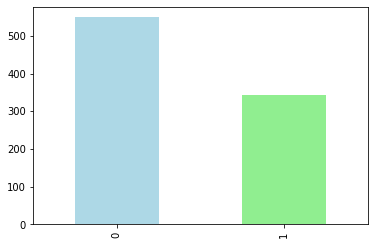

In [7]:
train.Survived.value_counts().plot(kind = 'bar', color = ['lightblue', 'lightgreen']);

Let's check how many male and female was there

In [8]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

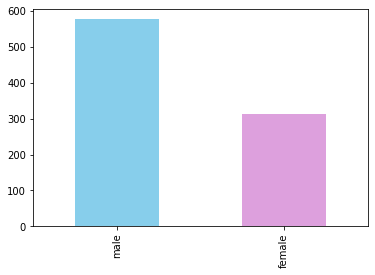

In [9]:
train.Sex.value_counts().plot(kind = 'bar', color = ['skyblue', 'plum']);

let's check out survivors w.r.t sex

In [10]:
pd.crosstab(train.Sex, train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


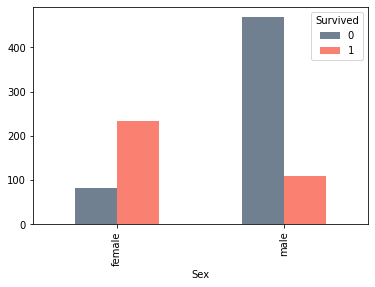

In [11]:
pd.crosstab(train.Sex, train.Survived).plot(kind = 'bar', color = ['slategray', 'salmon']);

Survivors w.r.t pclass

In [12]:
pd.crosstab(train.Pclass, train.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


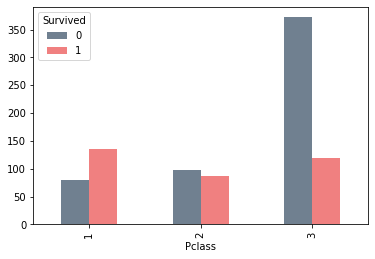

In [13]:
pd.crosstab(train.Pclass, train.Survived).plot(kind = 'bar', color = ['slategray', 'lightcoral']);

Let's check the Port of Embarkation

In [14]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

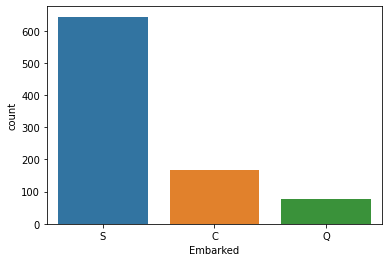

In [15]:
sns.countplot(x = 'Embarked', data = train);

Let's look at our age column

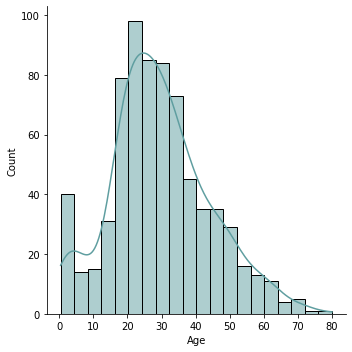

In [16]:
sns.displot(x = 'Age', data = train, color = 'cadetblue', kde = True);

Let's now find a relation among age, survived and pclass columns

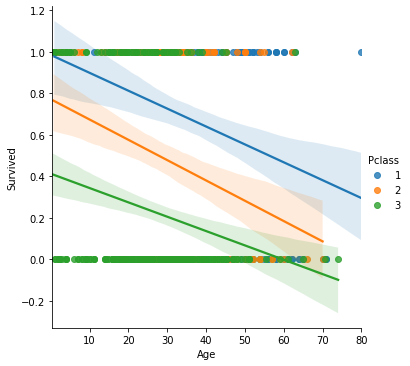

In [17]:
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Pclass', data = train);

# Preparing data to train Model

Removing columns that we don't need

In [18]:
new_train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [19]:
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
new_train.shape

(891, 8)

Checking for null values in dataset

In [21]:
new_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We have null values in two columns. Let's take care of this problem

Filling the null values of age columns with the mean values

In [22]:
new_train['Age'].fillna(new_train['Age'].mean(), inplace = True)

Now we have to take care of null values of Embarked column

Let's first check which embarkation port we have most in our dataset.

In [23]:
new_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

`Southampton` is the top port of embarkation. So we are fill the null values with `S`

In [24]:
new_train['Embarked'].fillna('S', inplace = True)

Let's check again for null values

In [25]:
new_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Nice!**

We don't any null values now

Let's create x and y matrix of features

In [26]:
x = new_train.drop('Survived',  axis = 1)
y = new_train['Survived']

In [27]:
x.shape

(891, 7)

In [28]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


We have two `categorical` columns. Let's take care of them now.

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Sex', 'Embarked']
onehotencode = OneHotEncoder()

transformer = ColumnTransformer([('Encoder', onehotencode, categorical_features)], remainder = 'passthrough')

encoded_x = transformer.fit_transform(x)

In [30]:
pd.DataFrame(encoded_x).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,3.0,35.0,0.0,0.0,8.0500


In [31]:
encoded_x.shape

(891, 10)

In [32]:
y.shape

(891,)

Let's now check wheather our dataset is imbalanced or not

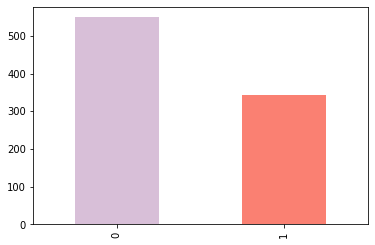

In [33]:
y.value_counts().plot(kind = 'bar', color = ['thistle', 'salmon']);

We have slight imbalance. Let's balance this to get good result

In [34]:
from imblearn.over_sampling import SMOTE

#Instanciating a object of SMOTE Class
smote = SMOTE()

# fit predictor and target variables
x_smote, y_smote = smote.fit_resample(encoded_x, y)

In [35]:
x_smote.shape

(1098, 10)

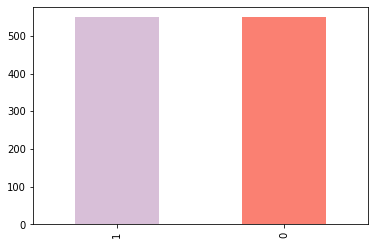

In [36]:
y_smote.value_counts().plot(kind = 'bar', color = ['thistle', 'salmon']);

**Now it is perfectly balanced as all things should be.**

# Preparing the test dataset

In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
test.shape

(418, 11)

Now, make a new version of test dataset removing unwanted columns

In [39]:
new_test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [40]:
new_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Ckecking for null values

In [41]:
new_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Filling the null values with mean values

In [42]:
new_test['Age'].fillna(new_train['Age'].mean(), inplace = True)

In [43]:
new_test['Fare'].fillna(new_train['Fare'].mean(), inplace = True)

As before we now have to take care of `categorical columns`

In [44]:
categorical_features = ['Sex', 'Embarked']
onehotencode = OneHotEncoder()

transformer = ColumnTransformer([('Encoder', onehotencode, categorical_features)], remainder = 'passthrough')

encoded_test_x = transformer.fit_transform(new_test)

In [45]:
pd.DataFrame(encoded_test_x).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,0.0,3.0,34.5,0.0,0.0,7.8292
1,1.0,0.0,0.0,0.0,1.0,3.0,47.0,1.0,0.0,7.0000
2,0.0,1.0,0.0,1.0,0.0,2.0,62.0,0.0,0.0,9.6875
3,0.0,1.0,0.0,0.0,1.0,3.0,27.0,0.0,0.0,8.6625
4,1.0,0.0,0.0,0.0,1.0,3.0,22.0,1.0,1.0,12.2875


In [46]:
encoded_test_x.shape

(418, 10)

Now let's create `y_test`

In [47]:
gender_sub = pd.read_csv('../input/titanic/gender_submission.csv')
y_test = gender_sub['Survived']

In [48]:
y_test.shape

(418,)

# Applying Machine Learning

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 7)
log_clf.fit(x_smote, y_smote)
log_score = log_clf.score(encoded_test_x, y_test)
log_score

0.9090909090909091

# Logistic Regression Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [51]:
log_grid = {'C': np.logspace(-4, 4),
            'solver': ['liblinear'],
            'max_iter': np.arange(100, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(x_smote, y_smote)
log_tuned_score = log_gscv.score(encoded_test_x, y_test)
log_tuned_score

Fitting 5 folds for each of 1900 candidates, totalling 9500 fits


0.9090909090909091

In [52]:
log_gscv.best_params_

{'C': 0.5689866029018293,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

# Linear SVC

In [53]:
from sklearn import svm
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_smote, y_smote)
svc_score = svc_clf.score(encoded_test_x, y_test)
svc_score

0.638755980861244

# SVC Hyperparameter tuning

In [54]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(x_smote, y_smote)
svc_tuned_score = log_gscv.score(encoded_test_x, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.9090909090909091

In [55]:
svc_gscv.best_params_

{'C': 8858.667904100832, 'degree': 2, 'kernel': 'rbf'}

# KNeighbors Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_smote, y_smote)
knn_score = knn_clf.score(encoded_test_x, y_test)
knn_score

0.6626794258373205

# KNeighbors Classifier Hyperparameter Tuning

In [57]:
knn_grid = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
            'p':[1,2,3,4,5], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}

knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True)

knn_gscv.fit(x_smote, y_smote)
knn_tuned_score = knn_gscv.score(encoded_test_x, y_test)
knn_tuned_score

Fitting 5 folds for each of 1755 candidates, totalling 8775 fits


0.6913875598086124

In [58]:
knn_gscv.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 3, 'p': 1}

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(n_estimators=1000, random_state = 35)
rand_clf.fit(x_smote, y_smote)
ranf_score = rand_clf.score(encoded_test_x, y_test)
ranf_score

0.8277511961722488

# Random Forest hyperparameter tuning

In [60]:
rfcv_grid = {"n_estimators": np.arange(500, 2000, 100),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rfcv_clf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rfcv_grid,
                           cv=5,
                           n_iter = 50,
                           verbose=True)

rfcv_clf.fit(x_smote, y_smote)
ranf_tuned_score = rfcv_clf.score(encoded_test_x, y_test)
ranf_tuned_score

Fitting 5 folds for each of 50 candidates, totalling 250 fits


0.8995215311004785

In [61]:
rfcv_clf.best_params_

{'n_estimators': 1300,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': None}

Let's make a dictionary of all models and accuracy

In [62]:
score = [{'Model':'Logistic Regression', 'Score': log_score, 'Tuned_score': log_tuned_score}, 
         {'Model':'SVC', 'Score': svc_score, 'Tuned_score': svc_tuned_score},
         {'Model':'KNN', 'Score': knn_score, 'Tuned_score': knn_tuned_score},
         {'Model':'Random Forest', 'Score': ranf_score, 'Tuned_score': ranf_tuned_score}]

Let's view all model score as a dataframe to get a good overview

In [63]:
pd.DataFrame(score, columns=['Model','Score','Tuned_score'])

,Model,Score,Tuned_score
0,Logistic Regression,0.909091,0.909091
1,SVC,0.638756,0.909091
2,KNN,0.662679,0.691388
3,Random Forest,0.827751,0.899522


`tuned logistic regression` and `tuned svc` has the highest accuracy.

We can use one of them to predict

**let's predict using `Logistic regression`**

In [64]:
y_preds = log_gscv.predict(encoded_test_x)

Check the result

In [65]:
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,232,34
1,4,148


Let's now check the classification report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       266
           1       0.81      0.97      0.89       152

    accuracy                           0.91       418
   macro avg       0.90      0.92      0.91       418
weighted avg       0.92      0.91      0.91       418



Now, check the `ROC` curve

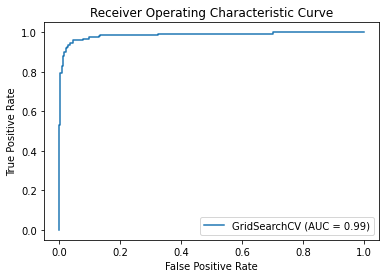

In [67]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_gscv, encoded_test_x, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# Creating file for submission 

In [68]:
final_data = {'PassengerId': test.PassengerId, 'Survived': y_preds}
final_submission = pd.DataFrame(data=final_data)
final_submission.to_csv('submission_file.csv',index =False)